# Ejemplo de función transferencia.

In [1]:
import matplotlib.pyplot as plt
import control as ct
import numpy as np

/home/abel/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Definimos una función transferencia.
num= [1]
den= [1, 2, 4]

FT= ct.tf(num, den)
print(FT)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      1
-------------
s^2 + 2 s + 4



In [3]:
# Defino función para graficar
def plottingFunction(xAxis, yAxis, titleString, fileName):
    plt.figure(figsize=(8, 6))
    plt.plot(xAxis, yAxis, color='blue', linewidth=4)
    plt.title(titleString, fontsize=14)
    plt.xlabel('Time [seg]', fontsize=14)
    plt.ylabel('Output', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.grid(visible=True)
    plt.savefig(fileName, dpi=600)
    plt.show()

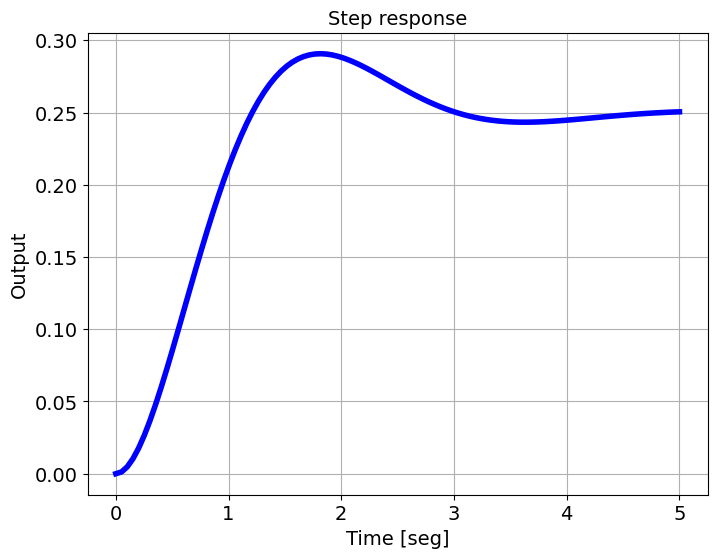

In [4]:
# Respuesta al escalón

# Definimos un vector de tiempo
# donde se tiene np.linspace(start, end, step)
t_vector= np.linspace(0, 5, 100)

# Se obtiene la respuesta al escalón
timeReturned, systemOutput= ct.step_response(FT, t_vector)

# Grafico la respuesta al escalón
plottingFunction(timeReturned, systemOutput,'Step response', 'stepResponse.png')


Para obtener la respuesta de una entrada específica se realiza lo siguiente:

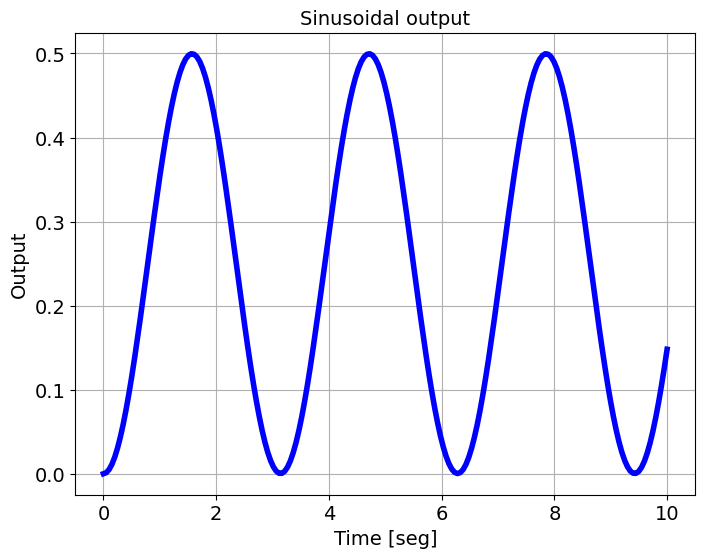

In [5]:
t_vector2= np.linspace(0, 10, 200)
inputVector2= np.sin(2*t_vector2)+np.ones(t_vector2.shape)

timeReturned2, systemOutput2= ct.forced_response(FT, t_vector2, inputVector2)
plottingFunction(t_vector2, systemOutput2, 'Sinusoidal output', 'Response to sinusoidal input.png')